# DNA Storage Experiment Analysis

Analyze ground truth and noisy reads for each of the 13 experiments after primer extraction.

In [1]:
import os
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

plt.style.use('default')
%matplotlib inline

In [2]:
# Path to processed data
processed_dir = '/workspaces/TReconLM/data/chandak/processed_data'

# Check if directory exists
if not os.path.exists(processed_dir):
    raise FileNotFoundError(f"Processed data directory not found: {processed_dir}")

print(f"Analyzing data from: {processed_dir}")
print(f"\nExperiment directories found:")
for i in range(13):
    exp_dir = f"{processed_dir}/experiment_{i}"
    exists = "[OK]" if os.path.exists(exp_dir) else "[MISSING]"
    print(f"  {exists} experiment_{i}")

Analyzing data from: /workspaces/TReconLM/data/chandak/processed_data

Experiment directories found:
  [OK] experiment_0
  [OK] experiment_1
  [OK] experiment_2
  [OK] experiment_3
  [OK] experiment_4
  [OK] experiment_5
  [OK] experiment_6
  [OK] experiment_7
  [OK] experiment_8
  [OK] experiment_9
  [OK] experiment_10
  [OK] experiment_11
  [OK] experiment_12


## Analyze Each Experiment

In [3]:
def analyze_experiment(exp_id, processed_dir):
    """
    Analyze ground truth and noisy reads for a single experiment.
    """
    exp_dir = f"{processed_dir}/experiment_{exp_id}"
    gt_file = f"{exp_dir}/gt.fa"
    reads_file = f"{exp_dir}/reads.fastq"
    
    print("="*70)
    print(f"EXPERIMENT {exp_id}")
    print("="*70)
    
    # Check if files exist
    if not os.path.exists(gt_file):
        print(f"WARNING: Ground truth file not found: {gt_file}")
        return None
    
    if not os.path.exists(reads_file):
        print(f"WARNING: Reads file not found: {reads_file}")
        return None
    
    # Read ground truth sequences
    gt_sequences = list(SeqIO.parse(gt_file, 'fasta'))
    gt_lengths = [len(rec.seq) for rec in gt_sequences]
    
    # Read noisy reads
    noisy_reads = list(SeqIO.parse(reads_file, 'fastq'))
    noisy_lengths = [len(rec.seq) for rec in noisy_reads]
    
    # Print statistics
    print(f"\nGROUND TRUTH:")
    print(f"  Number of sequences: {len(gt_sequences):,}")
    if len(gt_lengths) > 0:
        print(f"  Mean length: {np.mean(gt_lengths):.1f} ± {np.std(gt_lengths):.1f} bp")
        print(f"  Range: {min(gt_lengths)} - {max(gt_lengths)} bp")
    
    print(f"\nNOISY READS:")
    print(f"  Number of reads: {len(noisy_reads):,}")
    if len(noisy_lengths) > 0:
        print(f"  Mean length: {np.mean(noisy_lengths):.1f} ± {np.std(noisy_lengths):.1f} bp")
        print(f"  Median length: {np.median(noisy_lengths):.1f} bp")
        print(f"  Range: {min(noisy_lengths)} - {max(noisy_lengths)} bp")
        print(f"  Coverage: {len(noisy_reads) / len(gt_sequences):.1f}x reads per GT sequence")
    
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    
    # GT length distribution
    ax = axes[0]
    if len(gt_lengths) > 0:
        ax.hist(gt_lengths, bins=30, edgecolor='black', alpha=0.7, color='green')
        ax.axvline(np.mean(gt_lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(gt_lengths):.1f} bp')
        ax.set_xlabel('Sequence Length (bp)', fontsize=11)
        ax.set_ylabel('Count', fontsize=11)
        ax.set_title(f'Experiment {exp_id}: Ground Truth Length Distribution\n({len(gt_sequences):,} sequences)', fontsize=12, fontweight='bold')
        ax.legend()
        ax.grid(alpha=0.3)
    
    # Noisy reads length distribution
    ax = axes[1]
    if len(noisy_lengths) > 0:
        ax.hist(noisy_lengths, bins=50, edgecolor='black', alpha=0.7, color='blue')
        ax.axvline(np.mean(noisy_lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(noisy_lengths):.1f} bp')
        ax.axvline(np.median(noisy_lengths), color='orange', linestyle='--', linewidth=2, label=f'Median: {np.median(noisy_lengths):.1f} bp')
        # Add GT mean for comparison
        if len(gt_lengths) > 0:
            ax.axvline(np.mean(gt_lengths), color='green', linestyle=':', linewidth=2, alpha=0.7, label=f'GT Mean: {np.mean(gt_lengths):.1f} bp')
        ax.set_xlabel('Read Length (bp)', fontsize=11)
        ax.set_ylabel('Count', fontsize=11)
        ax.set_title(f'Experiment {exp_id}: Noisy Reads Length Distribution\n({len(noisy_reads):,} reads)', fontsize=12, fontweight='bold')
        ax.legend()
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'exp_id': exp_id,
        'num_gt': len(gt_sequences),
        'num_reads': len(noisy_reads),
        'gt_mean_len': np.mean(gt_lengths) if len(gt_lengths) > 0 else 0,
        'gt_std_len': np.std(gt_lengths) if len(gt_lengths) > 0 else 0,
        'reads_mean_len': np.mean(noisy_lengths) if len(noisy_lengths) > 0 else 0,
        'reads_std_len': np.std(noisy_lengths) if len(noisy_lengths) > 0 else 0,
        'reads_median_len': np.median(noisy_lengths) if len(noisy_lengths) > 0 else 0,
        'coverage': len(noisy_reads) / len(gt_sequences) if len(gt_sequences) > 0 else 0
    }

EXPERIMENT 0

GROUND TRUTH:
  Number of sequences: 1,466
  Mean length: 108.0 ± 0.0 bp
  Range: 108 - 108 bp

NOISY READS:
  Number of reads: 291,436
  Mean length: 110.2 ± 15.5 bp
  Median length: 110.0 bp
  Range: 50 - 200 bp
  Coverage: 198.8x reads per GT sequence


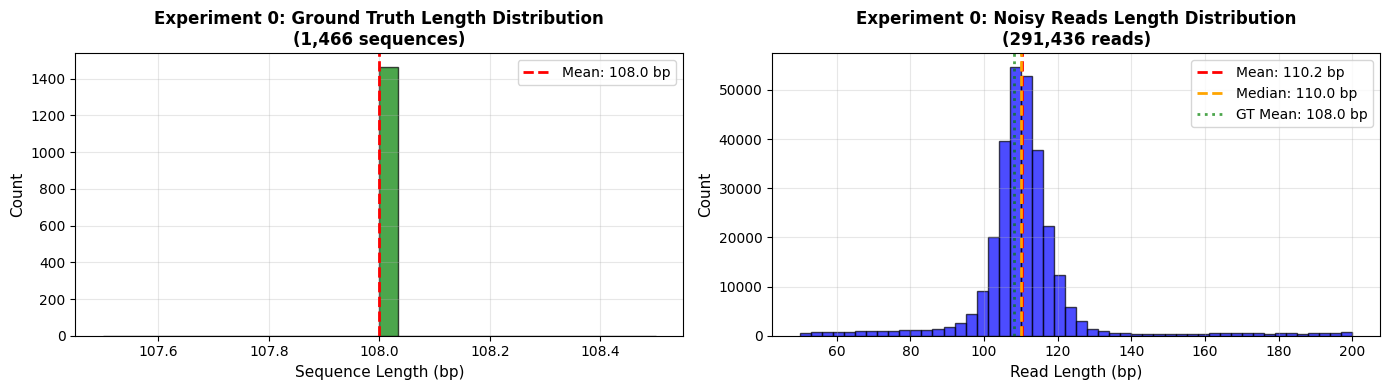



EXPERIMENT 1

GROUND TRUTH:
  Number of sequences: 1,466
  Mean length: 111.0 ± 0.0 bp
  Range: 111 - 111 bp

NOISY READS:
  Number of reads: 253,886
  Mean length: 115.3 ± 21.8 bp
  Median length: 113.0 bp
  Range: 50 - 200 bp
  Coverage: 173.2x reads per GT sequence


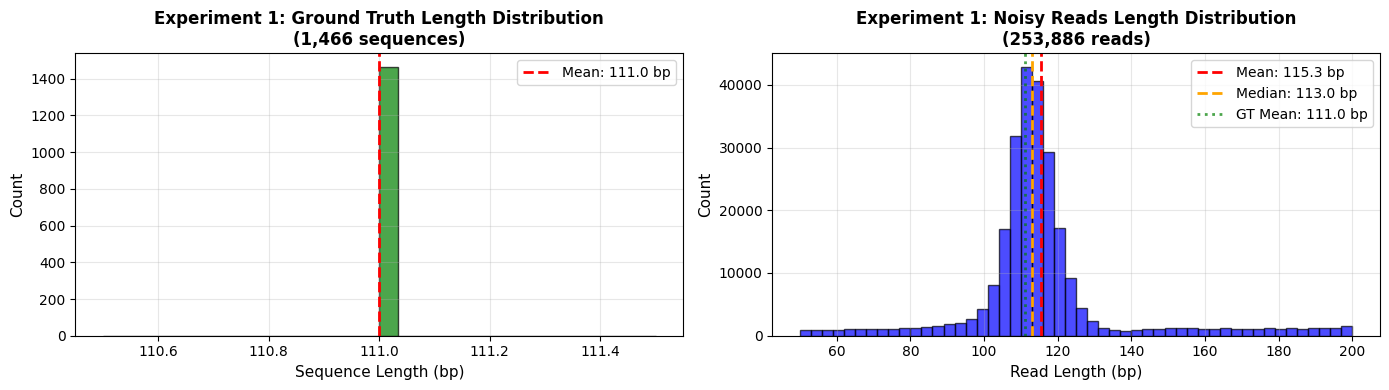



EXPERIMENT 2

GROUND TRUTH:
  Number of sequences: 1,466
  Mean length: 114.0 ± 0.0 bp
  Range: 114 - 114 bp

NOISY READS:
  Number of reads: 634,914
  Mean length: 115.2 ± 13.7 bp
  Median length: 116.0 bp
  Range: 50 - 200 bp
  Coverage: 433.1x reads per GT sequence


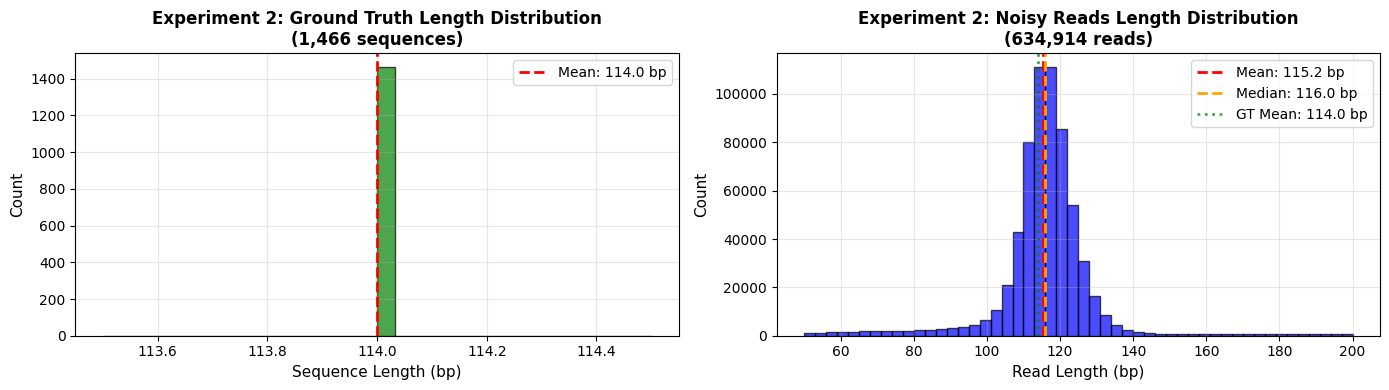



EXPERIMENT 3

GROUND TRUTH:
  Number of sequences: 815
  Mean length: 115.0 ± 0.0 bp
  Range: 115 - 115 bp

NOISY READS:
  Number of reads: 127,068
  Mean length: 118.8 ± 21.8 bp
  Median length: 117.0 bp
  Range: 50 - 200 bp
  Coverage: 155.9x reads per GT sequence


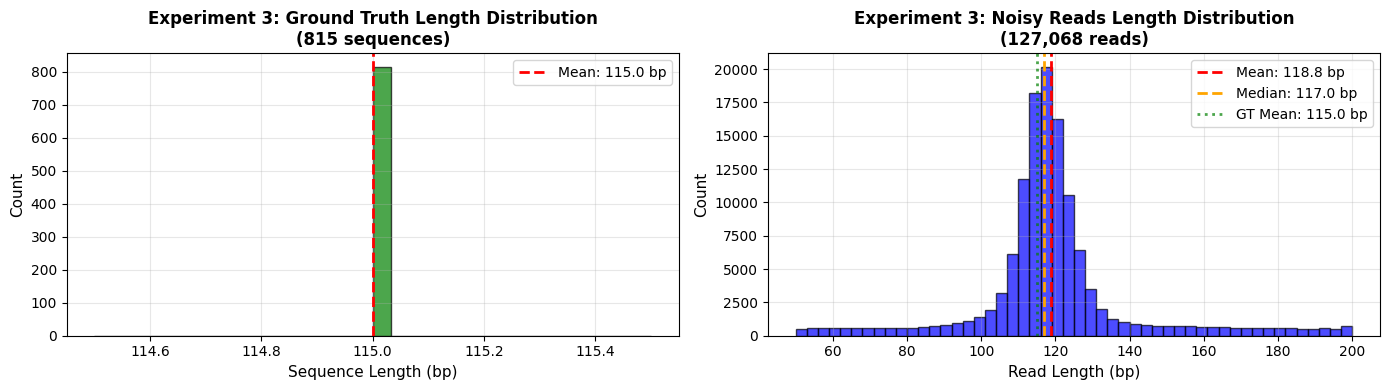



EXPERIMENT 4

GROUND TRUTH:
  Number of sequences: 815
  Mean length: 117.0 ± 0.0 bp
  Range: 117 - 117 bp

NOISY READS:
  Number of reads: 149,622
  Mean length: 118.8 ± 16.4 bp
  Median length: 119.0 bp
  Range: 50 - 200 bp
  Coverage: 183.6x reads per GT sequence


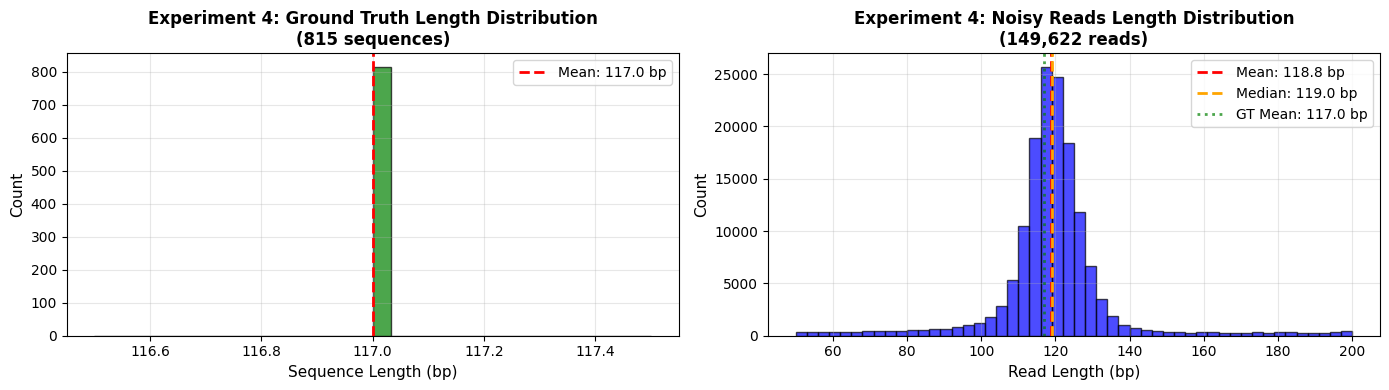



EXPERIMENT 5

GROUND TRUTH:
  Number of sequences: 815
  Mean length: 119.0 ± 0.0 bp
  Range: 119 - 119 bp

NOISY READS:
  Number of reads: 143,343
  Mean length: 120.5 ± 17.7 bp
  Median length: 121.0 bp
  Range: 50 - 200 bp
  Coverage: 175.9x reads per GT sequence


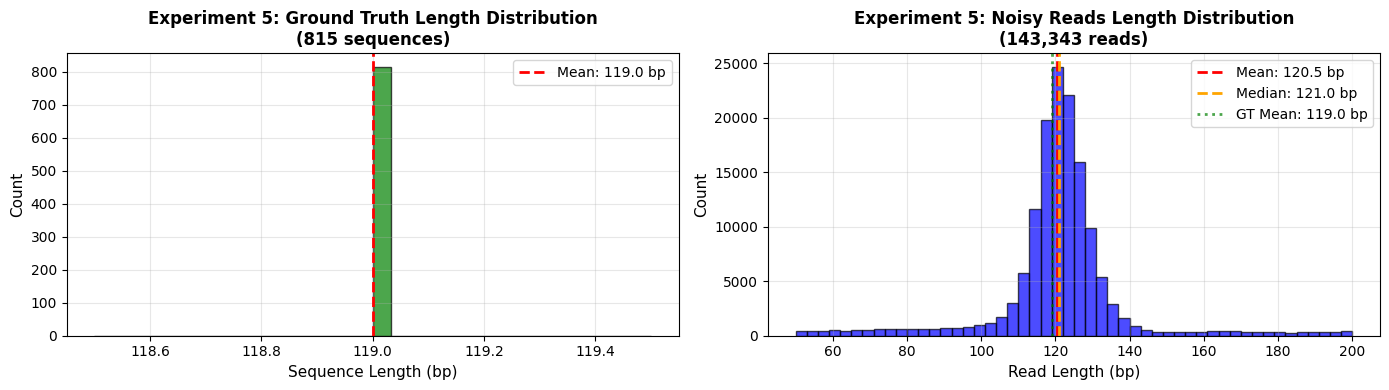



EXPERIMENT 6

GROUND TRUTH:
  Number of sequences: 733
  Mean length: 113.0 ± 0.0 bp
  Range: 113 - 113 bp

NOISY READS:
  Number of reads: 151,913
  Mean length: 113.3 ± 14.6 bp
  Median length: 114.0 bp
  Range: 50 - 200 bp
  Coverage: 207.2x reads per GT sequence


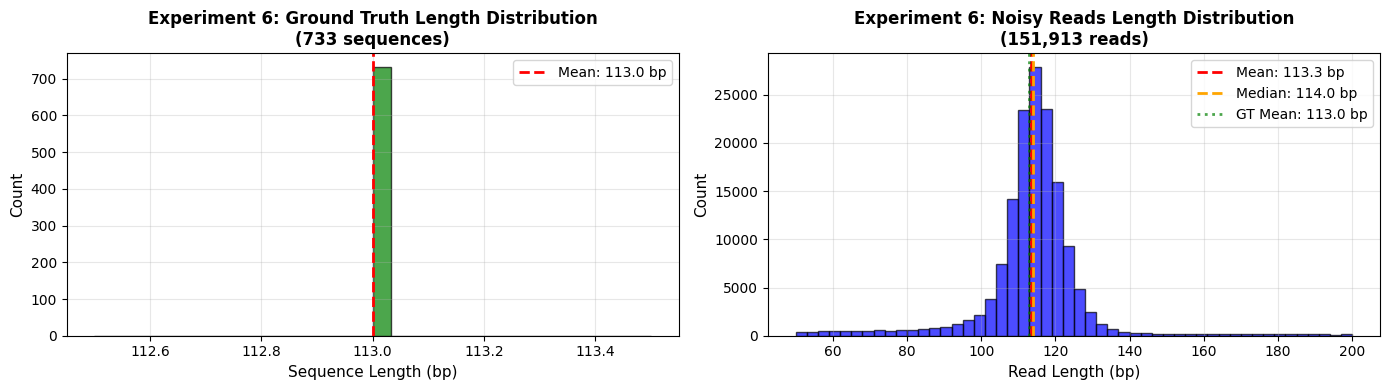



EXPERIMENT 7

GROUND TRUTH:
  Number of sequences: 733
  Mean length: 115.0 ± 0.0 bp
  Range: 115 - 115 bp

NOISY READS:
  Number of reads: 426,312
  Mean length: 116.3 ± 15.6 bp
  Median length: 116.0 bp
  Range: 50 - 200 bp
  Coverage: 581.6x reads per GT sequence


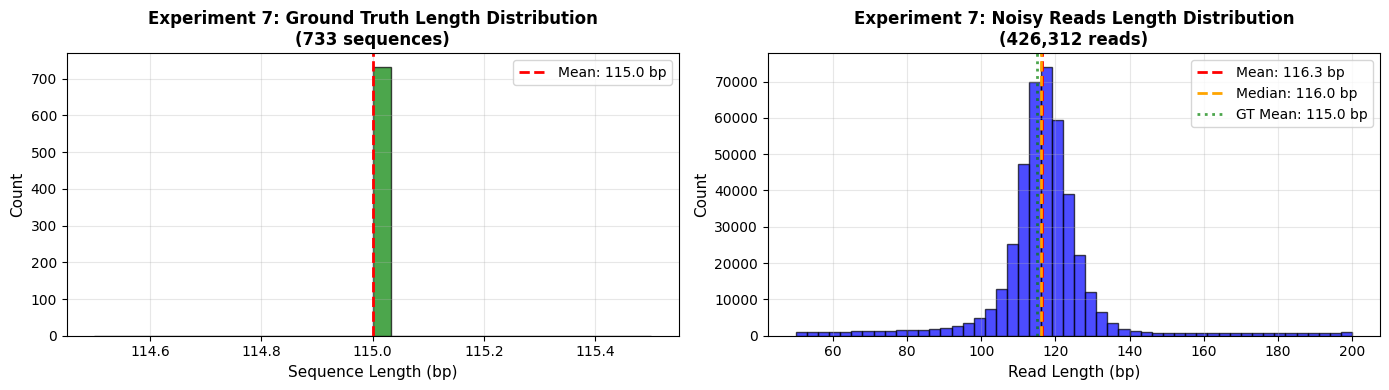



EXPERIMENT 8

GROUND TRUTH:
  Number of sequences: 733
  Mean length: 117.0 ± 0.0 bp
  Range: 117 - 117 bp

NOISY READS:
  Number of reads: 243,729
  Mean length: 118.9 ± 18.7 bp
  Median length: 118.0 bp
  Range: 50 - 200 bp
  Coverage: 332.5x reads per GT sequence


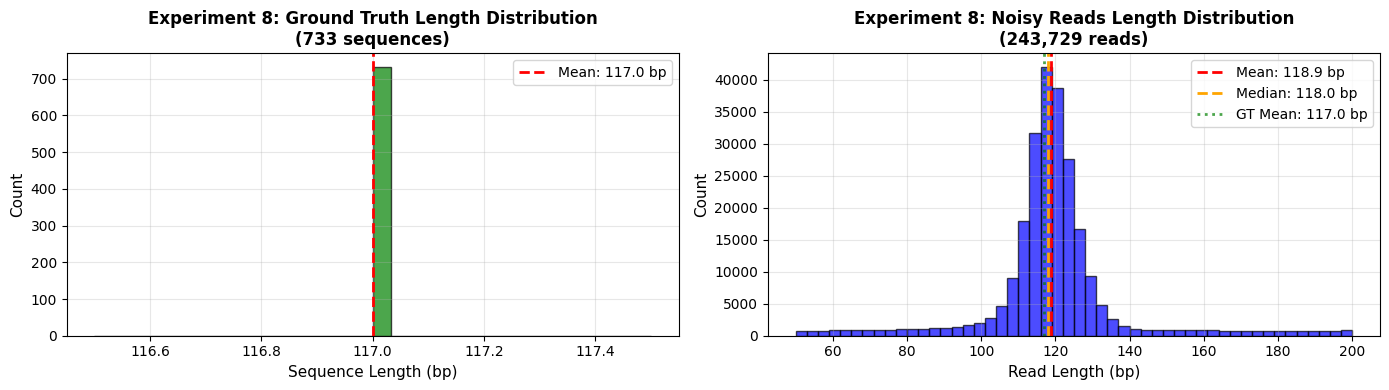



EXPERIMENT 9

GROUND TRUTH:
  Number of sequences: 752
  Mean length: 117.0 ± 0.0 bp
  Range: 117 - 117 bp

NOISY READS:
  Number of reads: 188,004
  Mean length: 117.7 ± 13.5 bp
  Median length: 118.0 bp
  Range: 50 - 200 bp
  Coverage: 250.0x reads per GT sequence


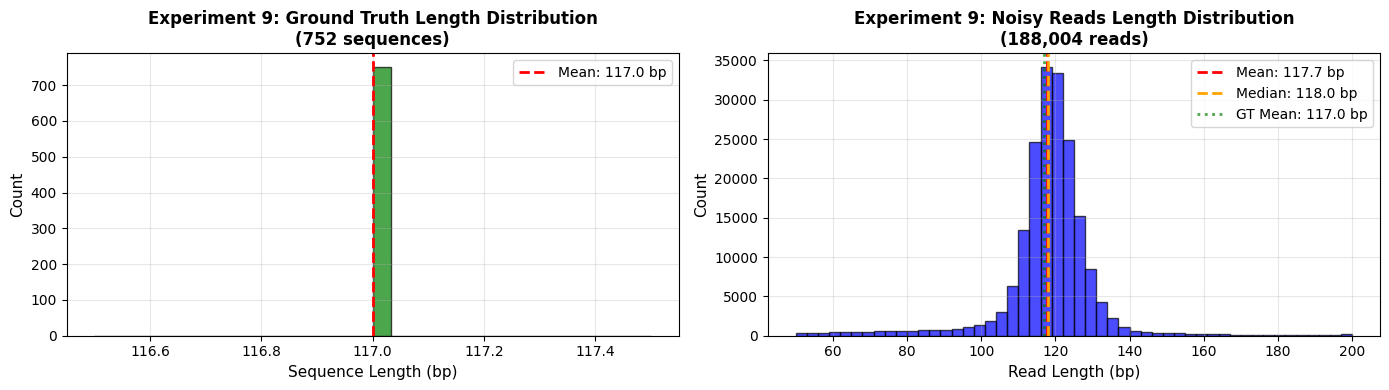



EXPERIMENT 10

GROUND TRUTH:
  Number of sequences: 877
  Mean length: 117.0 ± 0.0 bp
  Range: 117 - 117 bp

NOISY READS:
  Number of reads: 122,106
  Mean length: 119.8 ± 20.2 bp
  Median length: 118.0 bp
  Range: 50 - 200 bp
  Coverage: 139.2x reads per GT sequence


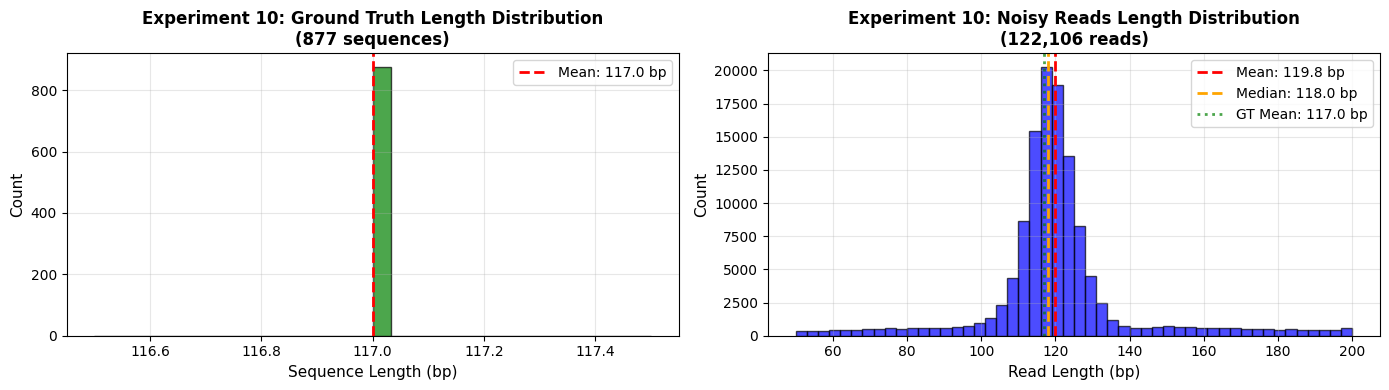



EXPERIMENT 11

GROUND TRUTH:
  Number of sequences: 815
  Mean length: 117.0 ± 0.0 bp
  Range: 117 - 117 bp

NOISY READS:
  Number of reads: 131,086
  Mean length: 117.0 ± 13.6 bp
  Median length: 118.0 bp
  Range: 50 - 200 bp
  Coverage: 160.8x reads per GT sequence


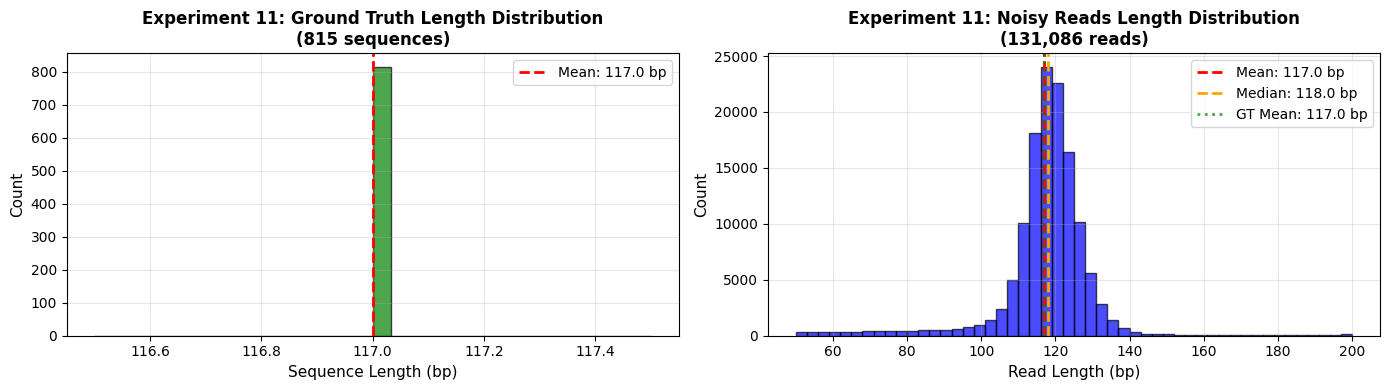



EXPERIMENT 12

GROUND TRUTH:
  Number of sequences: 815
  Mean length: 117.0 ± 0.0 bp
  Range: 117 - 117 bp

NOISY READS:
  Number of reads: 251,343
  Mean length: 118.4 ± 16.2 bp
  Median length: 118.0 bp
  Range: 50 - 200 bp
  Coverage: 308.4x reads per GT sequence


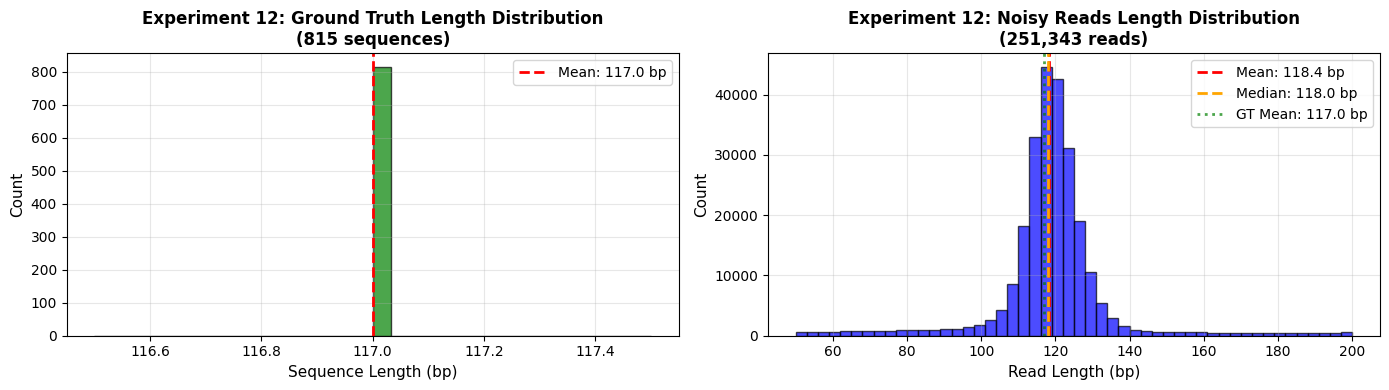

In [4]:
# Analyze all experiments
results = []

for exp_id in range(13):
    result = analyze_experiment(exp_id, processed_dir)
    if result is not None:
        results.append(result)
    print("\n")

## Summary Across All Experiments

In [5]:
# Create summary dataframe
summary_df = pd.DataFrame(results)

print("="*70)
print("SUMMARY ACROSS ALL EXPERIMENTS")
print("="*70)
print("\n", summary_df.to_string(index=False))

print("\n" + "="*70)
print("TOTALS:")
print(f"  Total GT sequences: {summary_df['num_gt'].sum():,}")
print(f"  Total noisy reads: {summary_df['num_reads'].sum():,}")
print(f"  Overall coverage: {summary_df['num_reads'].sum() / summary_df['num_gt'].sum():.1f}x")
print("="*70)

SUMMARY ACROSS ALL EXPERIMENTS

  exp_id  num_gt  num_reads  gt_mean_len  gt_std_len  reads_mean_len  reads_std_len  reads_median_len   coverage
      0    1466     291436        108.0         0.0      110.248319      15.492971             110.0 198.796726
      1    1466     253886        111.0         0.0      115.344261      21.845679             113.0 173.182810
      2    1466     634914        114.0         0.0      115.242913      13.736921             116.0 433.092769
      3     815     127068        115.0         0.0      118.802153      21.842742             117.0 155.911656
      4     815     149622        117.0         0.0      118.801780      16.374034             119.0 183.585276
      5     815     143343        119.0         0.0      120.461376      17.671178             121.0 175.880982
      6     733     151913        113.0         0.0      113.336594      14.572179             114.0 207.248295
      7     733     426312        115.0         0.0      116.261721    

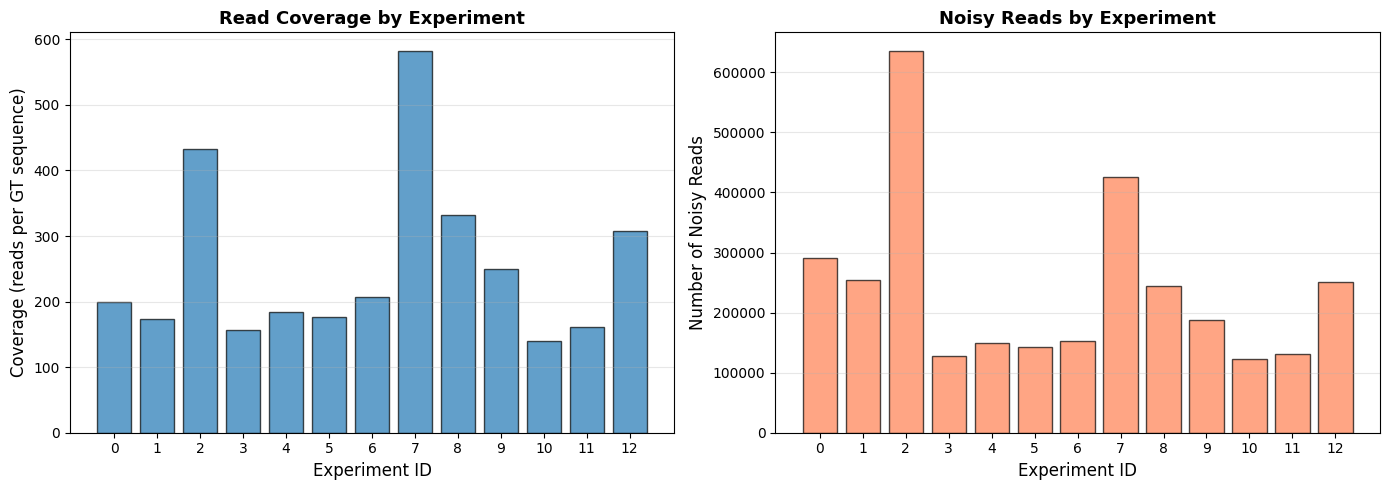

In [6]:
# Visualize coverage across experiments
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Coverage per experiment
ax = axes[0]
ax.bar(summary_df['exp_id'], summary_df['coverage'], edgecolor='black', alpha=0.7)
ax.set_xlabel('Experiment ID', fontsize=12)
ax.set_ylabel('Coverage (reads per GT sequence)', fontsize=12)
ax.set_title('Read Coverage by Experiment', fontsize=13, fontweight='bold')
ax.set_xticks(range(13))
ax.grid(alpha=0.3, axis='y')

# Number of reads per experiment
ax = axes[1]
ax.bar(summary_df['exp_id'], summary_df['num_reads'], edgecolor='black', alpha=0.7, color='coral')
ax.set_xlabel('Experiment ID', fontsize=12)
ax.set_ylabel('Number of Noisy Reads', fontsize=12)
ax.set_title('Noisy Reads by Experiment', fontsize=13, fontweight='bold')
ax.set_xticks(range(13))
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()